In [ ]:
# STEP 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# for better plots
sns.set(style="whitegrid")


In [ ]:

# STEP 1: Load Dataset
df = pd.read_csv("sales_data_with_discounts.csv")

print("Dataset Shape:", df.shape)
display(df.head())
df.info()


Dataset Shape: (450, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
# STEP 2: Descriptive Statistics (Numerical Columns)
# Select only numerical columns
num_cols = df.select_dtypes(include=["int64","float64"]).columns
print("Numerical Columns:", num_cols)

# Summary statistics
desc_stats = df[num_cols].describe().T
display(desc_stats)

# Mode separately (because describe() doesn’t include)
for col in num_cols:
    print(f"Mode of {col}: {df[col].mode()[0]}")


Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Volume,450.0,5.066667,4.231602,1.000000,3.000000,4.000000,6.000000,31.000000
Avg Price,450.0,10453.433333,18079.904840,290.000000,465.000000,1450.000000,10100.000000,60100.000000
Total Sales Value,450.0,33812.835556,50535.074173,400.000000,2700.000000,5700.000000,53200.000000,196400.000000
Discount Rate (%),450.0,15.155242,4.220602,5.007822,13.965063,16.577766,18.114718,19.992407
Discount Amount,450.0,3346.499424,4509.902963,69.177942,460.459304,988.933733,5316.495427,25738.022194
Net Sales Value,450.0,30466.336131,46358.656624,326.974801,2202.208645,4677.788059,47847.912852,179507.479049


Mode of Volume: 3
Mode of Avg Price: 400
Mode of Total Sales Value: 24300
Mode of Discount Rate (%): 5.007822189204133
Mode of Discount Amount: 69.17794228822787
Mode of Net Sales Value: 326.97480055470817


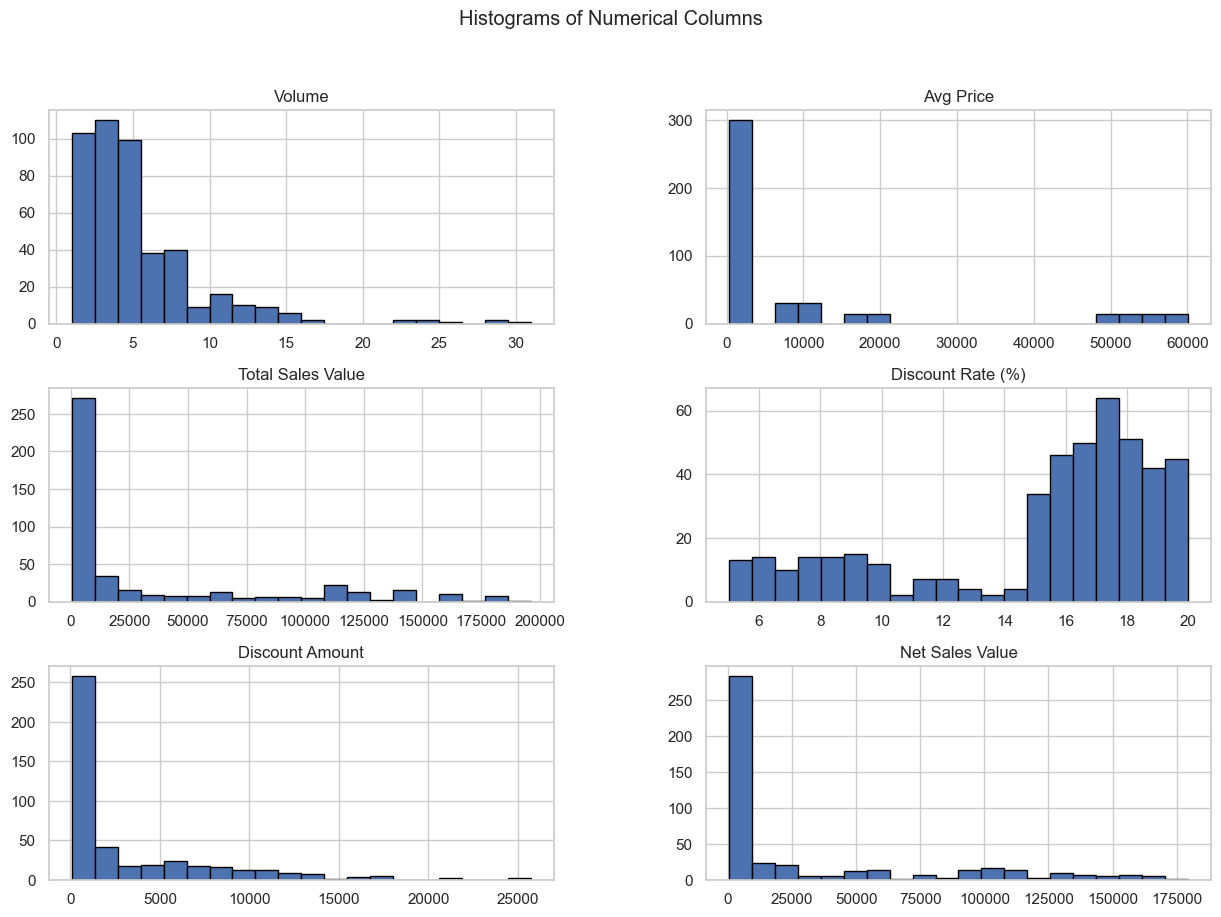

In [ ]:
# STEP 3: Data Visualization

# Histograms for numerical columns
df[num_cols].hist(bins=20, figsize=(15,10), edgecolor="black")
plt.suptitle("Histograms of Numerical Columns")
plt.show()




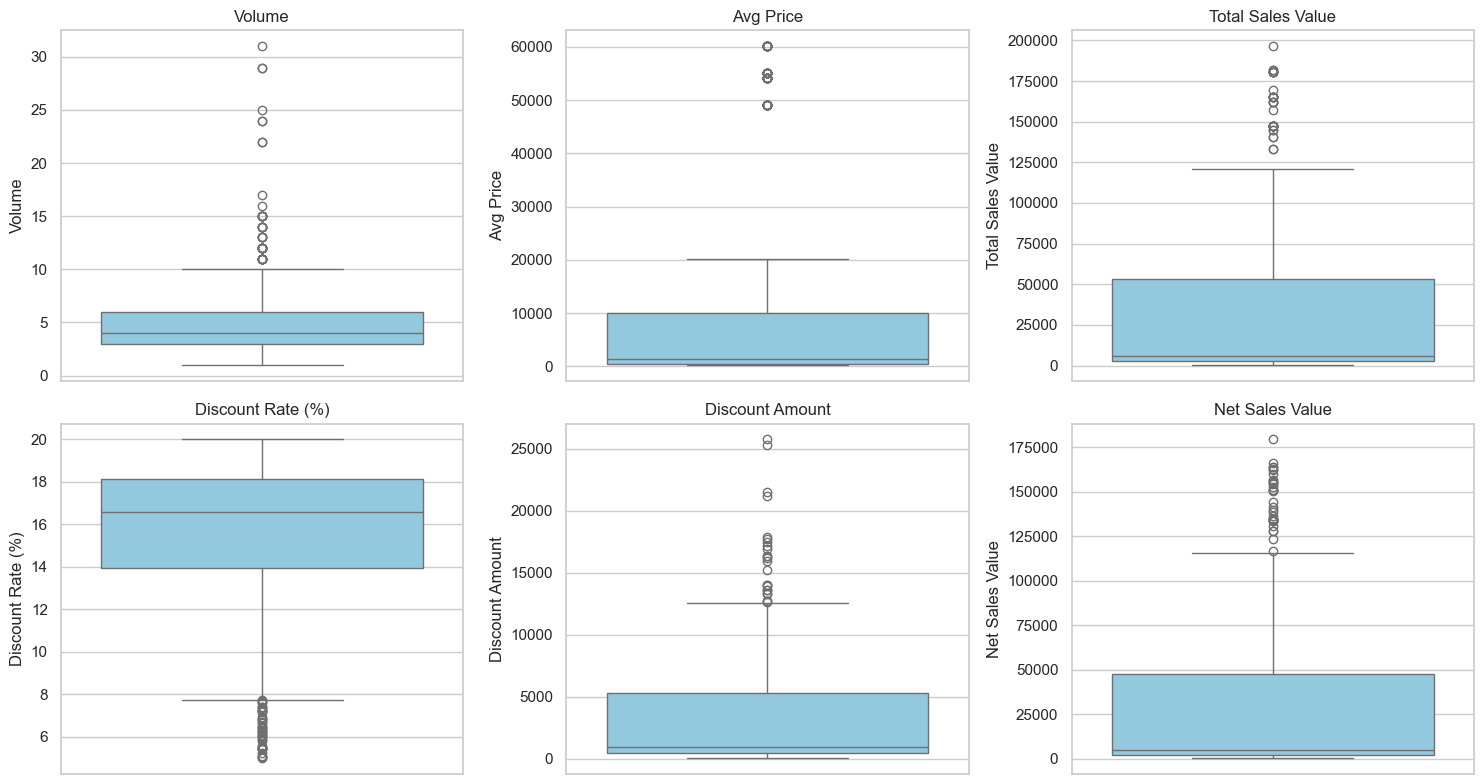

In [5]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


C:\Users\mohds\AppData\Local\Temp\ipykernel_1440\283805318.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


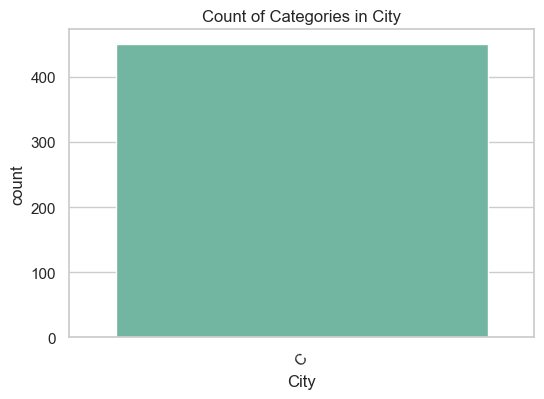

C:\Users\mohds\AppData\Local\Temp\ipykernel_1440\283805318.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


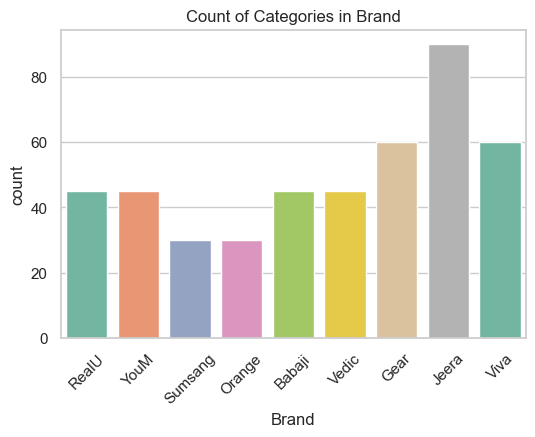

C:\Users\mohds\AppData\Local\Temp\ipykernel_1440\283805318.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


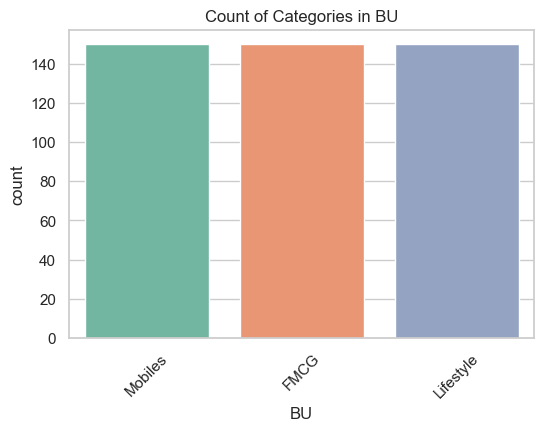

In [ ]:
# STEP 4: Bar Chart for Categorical Columns
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_cols)

# Example: City, Brand, BU
for col in ["City", "Brand", "BU"]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count of Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# STEP 5: Standardization (Z-score Normalization)

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

print("Before Scaling (first 5 rows):")
display(df[num_cols].head())

print("\nAfter Scaling (first 5 rows):")
display(df_scaled[num_cols].head())


Before Scaling (first 5 rows):


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770



After Scaling (first 5 rows):


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


In [ ]:
# STEP 6: One-Hot Encoding (Dummy Variables)
df_encoded = pd.get_dummies(df_scaled, columns=cat_cols, drop_first=True)

print("Original Shape:", df.shape)
print("Encoded Shape:", df_encoded.shape)

# Show sample
df_encoded.head()


Original Shape: (450, 13)
Encoded Shape: (450, 94)


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# STEP 7: Conclusion
print("""
✅ Descriptive analytics performed (mean, median, mode, std).
✅ Data distributions visualized (histograms, boxplots).
✅ Categorical data explored with bar charts.
✅ Numerical columns standardized (z-score).
✅ Categorical columns converted into dummy variables for ML use.
""")



✅ Descriptive analytics performed (mean, median, mode, std).
✅ Data distributions visualized (histograms, boxplots).
✅ Categorical data explored with bar charts.
✅ Numerical columns standardized (z-score).
✅ Categorical columns converted into dummy variables for ML use.

